Compute filter edges
====================

In this tutorial we are going to learn how to compute the first order and second
order derivatives of an image using `kornia.filters`.


In [2]:
from matplotlib import pyplot as plt
import cv2
import numpy as np

import torch
import kornia
import torchvision

In [3]:
# We use OpenCV to load an image to memory represented in a numpy.array
img_bgr: np.array = cv2.imread('../data/doraemon.png', cv2.IMREAD_COLOR)

In [4]:
# Convert the numpy array to torch
x_bgr: torch.Tensor = kornia.image_to_tensor(img_bgr)
x_rgb: torch.Tensor = kornia.bgr_to_rgb(x_bgr)

In [14]:
# Create batch and normalize
x_rgb = x_rgb.expand(2, -1, -1, -1)  # 4xCxHxW
x_gray = kornia.rgb_to_grayscale(x_rgb.float() / 255.)

In [ ]:
def imshow(input: torch.Tensor):
    out: torch.Tensor = torchvision.utils.make_grid(input, nrow=2, padding=1)
    out_np: np.array = kornia.tensor_to_image(out)
    plt.imshow(out_np)
    plt.axis('off')

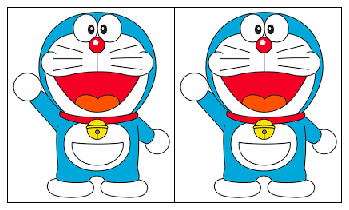

In [15]:
# Show original
imshow(x_rgb)

In [7]:
# Compute the 2nd order derivates
grads: torch.Tensor = kornia.spatial_gradient(x_gray, order=2)  # BxCx2xHxW
grads_x = grads[:, :, 0]
grads_y = grads[:, :, 1]

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


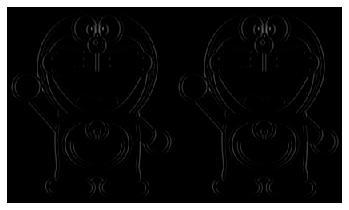

In [8]:
# Show second derivatives in x
imshow(grads_x)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


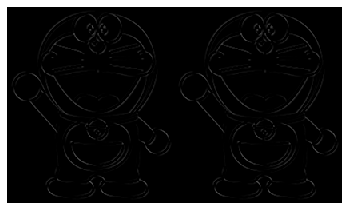

In [9]:
# Show second derivatives in y
imshow(grads_y)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


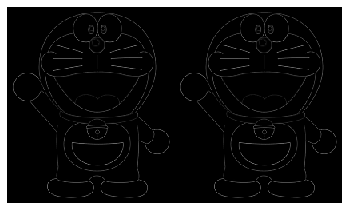

In [10]:
# Comute Laplacian Edges
x_laplacian: torch.Tensor = kornia.laplacian(x_gray, kernel_size=5)
imshow(x_laplacian)